#Introduction to CNN and CV with Tensorflow

CV is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

##Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/kmader/food41

However, it is modified to only use 2 classes (pizza and steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

🔑**Note:** We start with a smaller datset so we can experiment quickly and experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-03 15:58:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  33.6MB/s    in 3.1s    

2024-01-03 15:58:50 (33.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any ML project is becoming one with the data and for a CV project with usually means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames, in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
#in case there is an extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jan  3 15:58 .
drwxr-xr-x 1 root root 4096 Jan  3 15:58 ..
drwxr-xr-x 4 root root 4096 Jan  3 15:58 test
drwxr-xr-x 4 root root 4096 Jan  3 15:58 train


In [ ]:
#Another way to find out how many imahes are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
#Get the class names programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
#Remove .DS_Store in case it appears
calss_names = class_names[1:] #reset the class names just in case of any abnormalities (extra files)
print(class_names)

['pizza' 'steak']


In [ ]:
#Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1) #randomly sample one of the items in here
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #show the shape of the image

  return img

['34632.jpg']
Image shape: (384, 512, 3)


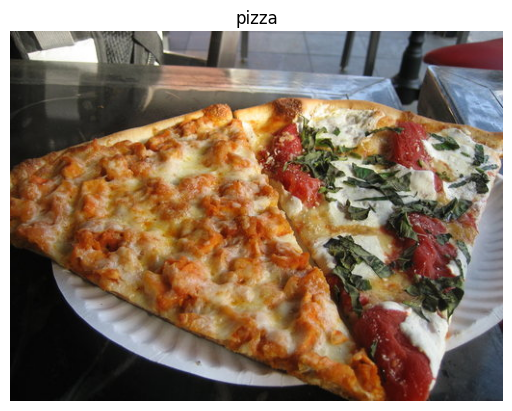

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [ ]:
# The images we've imported are actually giant arrays/tensors of different pixel values
import tensorflow as tf

#ternsors are inputs to our neural networks
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 42,  38,  35],
        [ 58,  54,  51],
        [ 57,  54,  49],
        ...,
        [154, 163, 170],
        [152, 163, 169],
        [151, 162, 168]],

       [[ 53,  49,  46],
        [ 44,  40,  37],
        [ 66,  63,  58],
        ...,
        [151, 161, 170],
        [150, 160, 169],
        [150, 160, 169]],

       [[ 50,  46,  43],
        [ 43,  39,  36],
        [ 66,  63,  58],
        ...,
        [148, 160, 172],
        [150, 162, 174],
        [151, 163, 175]],

       ...,

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [ 49,  59,  71],
        [ 48,  60,  72],
        [ 49,  61,  73]],

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [ 47,  55,  66],
        [ 48,  56,  69],
        [ 48,  56,  69]],

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [ 46,  52,  6

In [ ]:
#view the image shape
img.shape #returns width, height, colour channels

(384, 512, 3)

🔑**Note**: As we've discussed before, many ML models, including NNs prefer the values they work with the be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by diving the image arrays by 255. (since 255 is the maximum pixel value).

In [ ]:
#Scale features (normalize or standardize, neural networks tend to prefer normalization)
#Get all the pixel values between 0 & 1
img/255.

array([[[0.16470588, 0.14901961, 0.1372549 ],
        [0.22745098, 0.21176471, 0.2       ],
        [0.22352941, 0.21176471, 0.19215686],
        ...,
        [0.60392157, 0.63921569, 0.66666667],
        [0.59607843, 0.63921569, 0.6627451 ],
        [0.59215686, 0.63529412, 0.65882353]],

       [[0.20784314, 0.19215686, 0.18039216],
        [0.17254902, 0.15686275, 0.14509804],
        [0.25882353, 0.24705882, 0.22745098],
        ...,
        [0.59215686, 0.63137255, 0.66666667],
        [0.58823529, 0.62745098, 0.6627451 ],
        [0.58823529, 0.62745098, 0.6627451 ]],

       [[0.19607843, 0.18039216, 0.16862745],
        [0.16862745, 0.15294118, 0.14117647],
        [0.25882353, 0.24705882, 0.22745098],
        ...,
        [0.58039216, 0.62745098, 0.6745098 ],
        [0.58823529, 0.63529412, 0.68235294],
        [0.59215686, 0.63921569, 0.68627451]],

       ...,

       [[0.01960784, 0.01960784, 0.01960784],
        [0.01960784, 0.01960784, 0.01960784],
        [0.01960784, 0

## An end-to-end example

Let's build a CNN to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocss data (get all of the pixel values between 0 & 1, also called scaling/normalization )
#Generate batches of tensor image data with real-time data augmentation (the data will be looped over in batches).
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1/.255)

#Setup paths to our data directories
train_dir = "/content/pizza_steak/train" # 1 solution: copy path from folder (top left the 3 dots)
test_dir = "pizza_steak/test" # 2 solution: manually set it up

#Import data from directories and turn it into batches
#takes the path to a directory & generates batches of augmented data
#batch_size = 32 is very common, seen a lot in the world of deep learning
# why 224? very common shape to use for images
#Telling datagen we're importing data in a binary format, we're working with 2 classes
#seed = 42 for reproducibiliy
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

#Build a CNN model (same as the Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


#Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
train_data[0][0].shape

(32, 224, 224, 3)

In [ ]:
train_data[0][1].shape

(32,)

In [ ]:
train_data[0]

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [ ]:
#Fit the model
#for this dataset, we basically need to do 47 steps per epoch

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

🔑**Note:** If the above cell is taking longer than ~20 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above).

##Explanation for the accuracy vs val_accuracy

Epoch 19/20 53/53 [==============================] - 280s - loss: 0.3931 - acc: 0.8238 - val_loss: 0.5002 - val_acc: 0.7757

Epoch 20/20 53/53 [==============================] - 278s - loss: 0.3957 - acc: 0.8255 - val_loss: 0.5009 - val_acc: 0.7754

accuracy: 0.790697674418604

It is common for validation accuracy to be lower than accuracy. But ideally, you should strive to keep those values at the same level. If validation accuracy is much lower than accuracy, you are certainly over fitting (like in the example above) - where the accuracy is 84 and validation accuracy is 77.

Edit: Regarding 'accuracy' in the last line of the log, that is the accuracy of the network after all epochs run against the test data set. This is usually more closer to 'val_acc' than accuracy (like in the case above it is 79). This just means that the samples in test data alinged more closely than samples in validation data in the last epoch run (remember both these sets are not used for training)

In any case, I think you should tweak to make sure that 'acc' and 'val_acc' and final 'accuracy' are more closer to each other

In [ ]:
# the number of images / batch size
len(train_data)
1500 / 32

46.875

In [ ]:
#Without the GPU acceleration
#Epoch 1/5
#47/47 [==============================] - 132s 3s/step - loss: 0.5715 - accuracy: 0.7007 - val_loss: 148.1234 - val_accuracy: 0.7860

#With the GPU acceleration
#Epoch 1/5
#47/47 [==============================] - 28s 325ms/step - loss: 0.5288 - accuracy: 0.7460 - val_loss: 290.8034 - val_accuracy: 0.7540

In [ ]:
#Get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Extra details regarding CNN

https://poloclub.github.io/cnn-explainer/

## Using the same model as before (shown in tutorials)

playground.tensorflow.org

Replicating a model we've built before to see if it works with our image data. The model we're building is from the [Tensorflow playground](
https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.76706&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [ ]:
train_data

In [ ]:
#set random seed
tf.random.set_seed(42)

#create a model to create the Tensorflow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 213ms/step - loss: 0.7745 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 14s 298ms/step - loss: 0.6932 - accuracy: 0.4773 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
#Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


The trainable params (602,141) is a lot higher than our CNN (31,101). Despite having 20 times more parameters than our first model, model_2 still performs terribly

**Trainable parameters** = learnable patterns that the model can figure out during training

So basically a big weight matrix and the 602,141 represents all numbers of our individual numbers in the big weight matrix, a.k.a. patterns that a model learns when it starts to look at training data

## Improving the non-CNN model to perform better

despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [ ]:
#set random seed
tf.random.set_seed(42)

#create a model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit the model
history_3 = model_3.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/10
47/47 [==============================] - 12s 215ms/step - loss: 2.4195 - accuracy: 0.6247 - val_loss: 761.6405 - val_accuracy: 0.6780
Epoch 2/10
47/47 [==============================] - 10s 210ms/step - loss: 0.8076 - accuracy: 0.7113 - val_loss: 404.8679 - val_accuracy: 0.7440
Epoch 3/10
47/47 [==============================] - 9s 199ms/step - loss: 0.7207 - accuracy: 0.7280 - val_loss: 1268.6428 - val_accuracy: 0.5680
Epoch 4/10
47/47 [==============================] - 9s 192ms/step - loss: 0.6280 - accuracy: 0.7600 - val_loss: 266.8246 - val_accuracy: 0.7780
Epoch 5/10
47/47 [==============================] - 10s 210ms/step - loss: 0.5819 - accuracy: 0.7647 - val_loss: 890.9918 - val_accuracy: 0.6840
Epoch 6/10
47/47 [==============================] - 10s 211ms/step - loss: 0.8232 - accuracy: 0.7453 - val_loss: 627.7827 - val_accuracy: 0.7000
Epoch 7/10
47/47 [==============================] - 10s 210ms/step - loss: 0.5637 - accuracy: 0.7847 - val_loss: 429.7253 - val_acc

In [ ]:
#get a summary of model_3
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 32)                4816928   
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,817,601
Trainable params: 4,817,601
Non-trainable params: 0
_________________________________________________________________


Model_3 has almost 5 mil parameters which is way more than the CNN (31k), but still doesn't perform anywhere good. --> Prime example of the power of CNNs, especially for things like computer vision.

Also to note that deep learning models (or neural networks in general) are actually quite versatile. Depending on how you format your data, as long as it's in some kind of tensor, chances are you can build almost any neural netowrk you want with tensorflow. If there are patterns there, then the NN will probably find them, it just depends on what kind of problem you're working with. It will dictate what kind of model you should use.

🔑**Note**: You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a CNN seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable parameters in our CNN, these are often more helpful in dechiphering different **features** in an image.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

Note: we have to turn all data into numbers (NNs can't handle images) and make sure that all the tensors are in the right shape. Then, of course, you have to normalize/standardize (preferably normalize)

['336637.jpg']
Image shape: (512, 383, 3)
['2992084.jpg']
Image shape: (512, 512, 3)


"\nThe subplot function takes three arguments: subplot(nrows, ncols, index). Here's what each argument represents:\n\nnrows (number of rows): It specifies the number of rows in the grid of subplots.\nncols (number of columns): It specifies the number of columns in the grid of subplots.\nindex: It specifies the current subplot's position in the grid, starting from 1 in the upper-left corner and increasing to the right and downwards.\n"

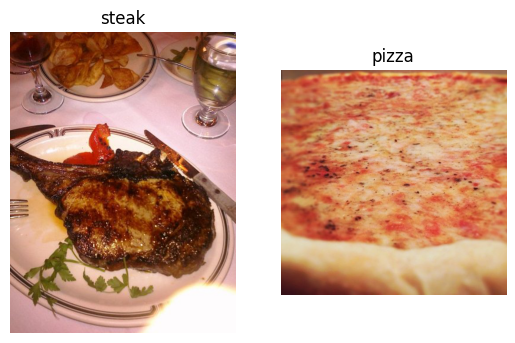

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

'''
The subplot function takes three arguments: subplot(nrows, ncols, index). Here's what each argument represents:

nrows (number of rows): It specifies the number of rows in the grid of subplots.
ncols (number of columns): It specifies the number of columns in the grid of subplots.
index: It specifies the current subplot's position in the grid, starting from 1 in the upper-left corner and increasing to the right and downwards.
'''

['1907039.jpg'] --> file path for our state image
Image shape: (512, 384, 3) --> this is the shape of the array or the tensor that our image gets read into
['2161241.jpg']
Image shape: (512, 382, 3)

If you recall back to our end-to-end example, we reshaped our images to all be the same size.

### 2. Preprocess the data (prepare it for a model)

In [ ]:
#Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

batch = small subset of the dataset that a model looks at during training. Rather than looking at all 10k images at one time and trying to find patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
1. 10k images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10k images in one hit could result in the model not being able to learn very well.

Why 32? Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?lang=en (Yann LeCun is the founder of CNNs, and one of the pioneers of the Deep Learning field)

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


ImageDataGenerator = Generate batches of tensor image data with real-time data augmentation.

In [ ]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# the rescale parameter is basically saying, when you load our images, divide all of the pixel values by 255, so we can normalize them
# we the the . at the end of 255 to turn them into a float (decimal)
# basically turn our image inputs into tensor data
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Load in our image data from our directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, #Target directory of images
                                               target_size = (224,224), #Target size of images (height, width)
                                               class_mode = "binary", # type of data you're working with
                                               batch_size = 32) # size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels) #they will be 32 because of how we defined the batch size 32 above

(32, 32)

In [ ]:
#How many batches are there?
len(train_data)

47

In [ ]:
# the output will be rounded up
# If the total number of images or the total number of data samples you have doesn't evenly divide, it's going to just get rounded up.
# So the last batch may have only 15 images or something like that, whatever equates to 1500
1500 / 32

46.875

In [ ]:
#Get the first 2 images of the first batch and the shape of the first image
images[:2], images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

In [ ]:
# view the first batch of labels
labels #imagine we have 1 for pizza and 0 for steak (or the other way around)

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

###3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a ML experiment and then you keep experimenting, you try to beat the baseline.

🔑**Note**: In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look up which current model is performing best in the field for your problem).

After you're done with the model you can control you can go to https://paperswithcode.com/sota and find a better architecture that fits your needs for the model.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model
model_4 = Sequential([
    Conv2D(filters = 10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size = (3, 3), # the size of the sliding window going across an input
           strides = 1, #the size of the step the sliding window takes across an input
           padding = "valid", # if "same", output shape is same as input_shape, if "valid", output shape gets compressed
           activation = "relu",
           input_shape = (224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation = "relu"), # padding and strides are actually valid and 1 by default
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid") #output layer (working with binary classification so only 1 output neuron)
])



*   filters: decides how many filters should pass over an input tensor (e.g. sliding window over an image). typical values: 10, 32, 64, 128 (higher values lead to more complex models)
*   kernel size (filter size): determines the shape of the filters (sliding window) over the output. typical values: 3, 5, 7 (lower values learn smaller features, higher values learn larger features)
*   padding: pads the target tensor with zeroes (if "same", holding more information in your tensor) to preserve input shape. Or leaves in te target tensor as is (if "valid", keep compressing the amount of information passing through each layer), lowering output shape. typical values: same or valid
*   strides: The number of steps a filter takes across an image at a time (e.g. if strides = 1, a filter moves across an image 1 pixel at a time). typical values: 1 (default), 2




**Hyperparameters**: input_shape, kernel size, padding, strides

In [ ]:
# Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
#get a summary of our input model
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


###4. Fit the model


In [ ]:
# Check lenghts of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, #this is combination of labels and sample data
                        epochs = 5,
                        steps_per_epoch = len(train_data), #telling tensoflow to step through the train data oe each epoch, take 47 steps because we want to go through all the batches
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 231ms/step - loss: 1.5116 - accuracy: 0.6620 - val_loss: 0.4574 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 22s 480ms/step - loss: 0.4406 - accuracy: 0.8080 - val_loss: 0.3913 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.2923 - accuracy: 0.8887 - val_loss: 0.3885 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 11s 231ms/step - loss: 0.1352 - accuracy: 0.9580 - val_loss: 0.4258 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.0519 - accuracy: 0.9893 - val_loss: 0.6324 - val_accuracy: 0.7740


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 177ms/step - loss: 0.2897 - accuracy: 0.8740


[0.2897088825702667, 0.8740000128746033]

###5. Evaluating our model

It looks like out model is learning something, let's evaluate it.

In [ ]:
#Let's plot the training curves
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize = (10, 7))

NameError: ignored

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #how many epochs did we run for?

  #Plot loss
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure() #every time you want a new figure you need to write this
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

🔑**Note**: When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the dataset. This means, it's learning patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

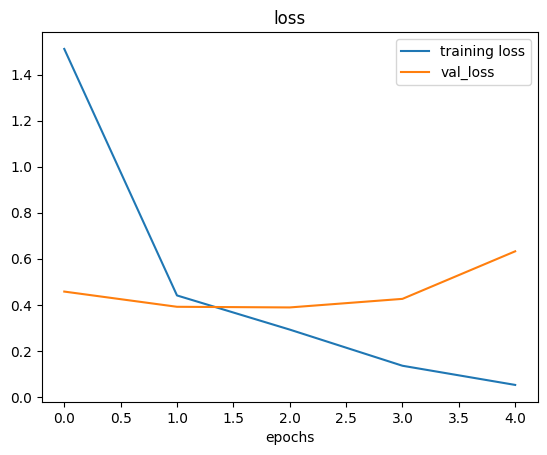

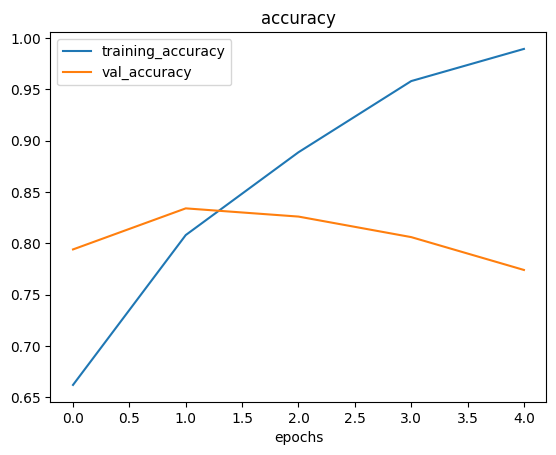

In [ ]:
#Check out the loss and accurcay of model_4
plot_loss_curves(history_4)

**Example**: You're student and you're **Course materials** are the **training set** which you learn 100%, but then you see if you understand it with the **Practice exam** which is the **validation set**. Finally, you see the **Final exam** which is the **test set** for which you're overfitting and you cannot do it as you only trained on the course material only and didn't generalize the concepts enough.

**Generalization** = the ability of a ML model to perform well on data it hasn't seen before.

**Underfitting** = when the loss in the training set doesn't decrease.

🔑**Note**: Ideally the 2 loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

###6. Adjust the model parameters

Fitting a ML model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our falttened layer

Reduce overfitting:
* Add data augmentation
* Add regulariztion layers (such as MaxPool2D)
* Add more data...

🔑**Note**: Reducing overfitting is also known as **regularization**.

In [ ]:
#Create the model(this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2), #finds the most important parts/features of a 2X2 square
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
#Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 219ms/step - loss: 0.6357 - accuracy: 0.6460 - val_loss: 0.5075 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4659 - accuracy: 0.7880 - val_loss: 0.3852 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4163 - accuracy: 0.8113 - val_loss: 0.3846 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3982 - accuracy: 0.8280 - val_loss: 0.3422 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3546 - accuracy: 0.8420 - val_loss: 0.3329 - val_accuracy: 0.8720


In [ ]:
#Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

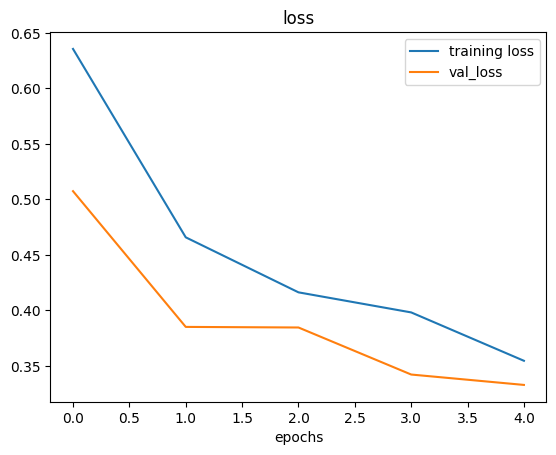

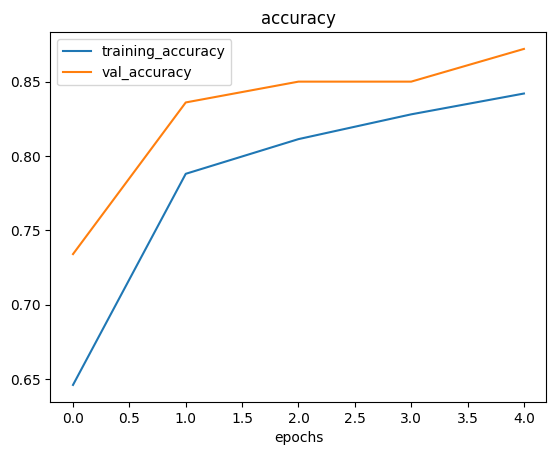

In [ ]:
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2, # how much do you want to rotate an image?
                                             shear_range = 0.2, # how much do you want to shear an image?
                                             zoom_range = 0.2, # zoom in randomly on an image
                                             width_shift_range = 0.2, # move your image around on the x-axis
                                             height_shift_range = 0.2, # move your image around on the y-axis
                                             horizontal_flip = True) # do you want to flip an image?
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

🤔 **Question**: What is data augmentation?

Data augmentation is the process of altering our data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it cropping it or something similar.

Let's write some code to visualize data augmentation...

In [ ]:
# Import data and augment it from training directory
print("Augmented training data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, #takes the path to a directory & generates batches of augmented data
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = False) #for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

#Create non-augmented test data batches
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "binary")

Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


🔑**Note**: Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters, our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #note: labels aren't augmented, only the images

showing image number: 12


(-0.5, 223.5, 223.5, -0.5)

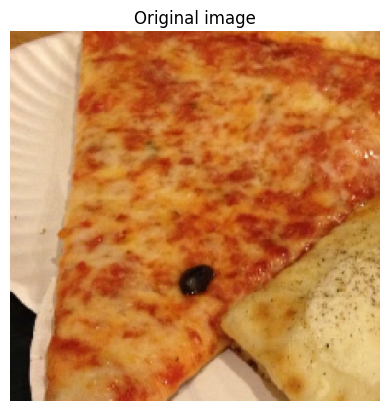

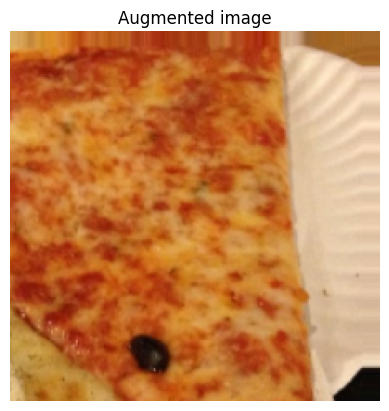

In [ ]:
#Show the original and augmented images
random_number = random.randint(0, 32)#our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

#Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, #fitting model_6 on augmented training data
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5


KeyboardInterrupt: ignored

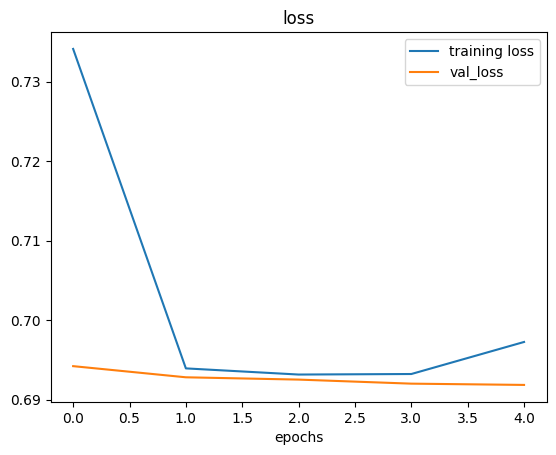

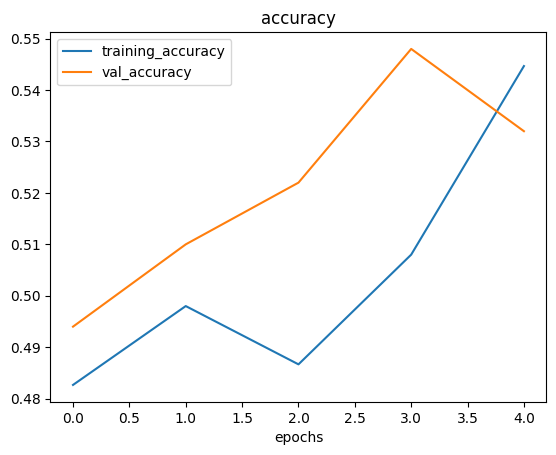

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (same as before) on it and see what happens

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir, #takes the path to a directory & generates batches of augmented data
                                                                            target_size = (224,224),
                                                                            batch_size = 32,
                                                                            class_mode = "binary",
                                                                            shuffle = True) #shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

#Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, #fitting on augmented and shuffled data now
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 84s 2s/step - loss: 0.6528 - accuracy: 0.6100 - val_loss: 0.5391 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 79s 2s/step - loss: 0.5573 - accuracy: 0.7200 - val_loss: 0.3974 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 79s 2s/step - loss: 0.5274 - accuracy: 0.7580 - val_loss: 0.4162 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 79s 2s/step - loss: 0.4822 - accuracy: 0.7720 - val_loss: 0.3720 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 79s 2s/step - loss: 0.4771 - accuracy: 0.7807 - val_loss: 0.3325 - val_accuracy: 0.8500


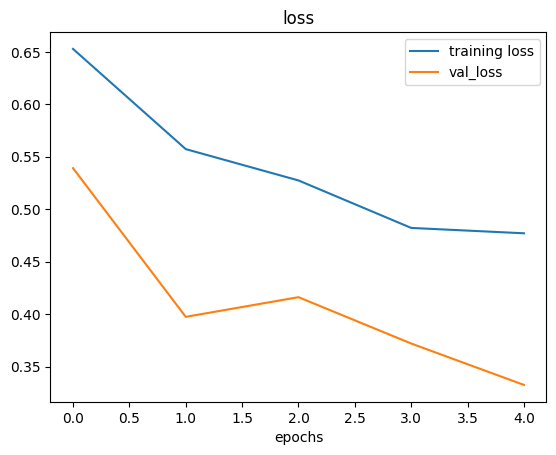

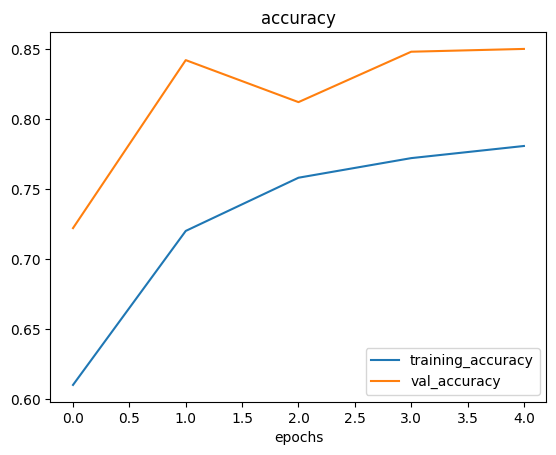

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

🔑**Note**: When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add mode `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case

⚒ **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-06-29 21:30:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-06-29 21:30:45 (26.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

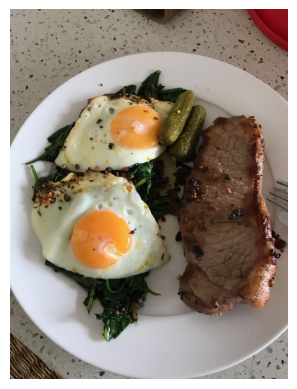

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

🔑**Note**: When you train a NN and you want to make a prediction with your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
#Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape = 224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, imgshape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
import tensorflow as tf
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis = 0)) # we make it [batch_size, width, height, colour_channels]
pred
#if the number was below 0.5 it would round up to pizza, but because it's above it rounds up to steak

1/1 [==============================] - 0s 143ms/step


array([[0.80487984]], dtype=float32)

Looks like our custom image has been put through our model, however, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as title.
  """
  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 31ms/step


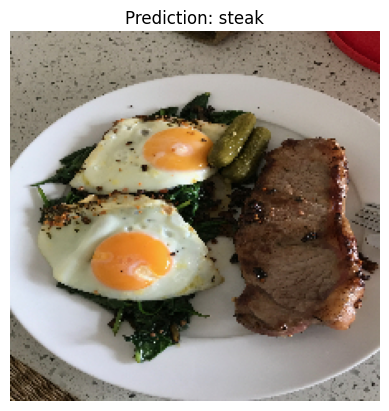

In [ ]:
#Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works!!! Let's try it on another image... this time pizza

--2023-06-29 21:32:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2023-06-29 21:32:22 (34.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 31ms/step


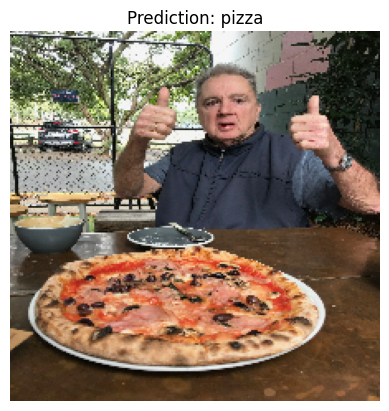

In [ ]:
#Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

1/1 [==============================] - 0s 43ms/step


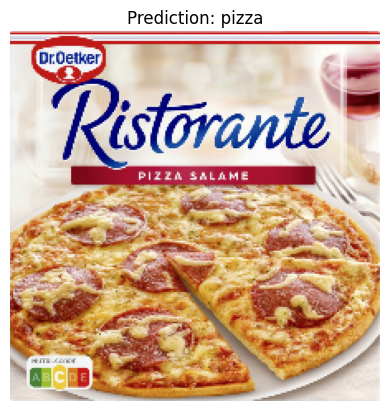

In [ ]:
# More predictions
#pred_and_plot(model_7, "angus.jpg")
pred_and_plot(model_7, "ristorante.jpg")
#pred_and_plot(model_7, "pizza-margharita.jpg")

#Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline / reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-06-29 22:08:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 142.250.145.128, 74.125.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  25.6MB/s    in 20s     

2023-06-29 22:08:22 (25.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

#walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in '10_food_classes_all_data' .
There are 10 directories and 0 images in '10_food_classes_all_data/test' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream' 

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Jun 29 22:08 .
drwxr-xr-x  1 root root 4096 Jun 29 22:08 ..
drwxr-xr-x 12 root root 4096 Jun 29 22:08 test
drwxr-xr-x 12 root root 4096 Jun 29 22:08 train


In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
#Let's get the class names

#This is how we get the names if we didn't have tensorflow and we just wanted to use numpy arrays and python path objects
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
#Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1) #randomly sample one of the items in here
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #show the shape of the image

  return img

['3590238.jpg']
Image shape: (512, 512, 3)


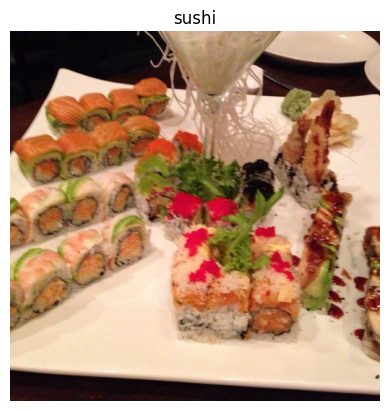

In [ ]:
#Visualise, Visualise, Visualise
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

#Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical") # "categorical" will be 2D one-hot encoded labels

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "categorical") # "categorical" will be 2D one-hot encoded labels

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the [CNN explainer website](https://poloclub.github.io/cnn-explainer/)... how about we just take their model (also on 10 classes) and use it for our problem...?

In [ ]:
len(class_names)

10

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

#Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3)),
    Activation(activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3, activation = "relu"),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation = "softmax") #changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

### 4. Fit a model

In [ ]:
#Fit the model
history_8 = model_8.fit(train_data, # this is now 10 different classes
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

#Don't forget! for 10 classes the guessing factor would be 0.1
# for 2 classes the guessing factor would be 0.5

Epoch 1/5
235/235 [==============================] - 64s 224ms/step - loss: 2.1267 - accuracy: 0.2220 - val_loss: 1.9713 - val_accuracy: 0.3072
Epoch 2/5
235/235 [==============================] - 51s 217ms/step - loss: 1.8372 - accuracy: 0.3688 - val_loss: 1.8461 - val_accuracy: 0.3460
Epoch 3/5
235/235 [==============================] - 52s 220ms/step - loss: 1.4630 - accuracy: 0.5145 - val_loss: 1.9859 - val_accuracy: 0.3424
Epoch 4/5
235/235 [==============================] - 51s 216ms/step - loss: 0.8514 - accuracy: 0.7227 - val_loss: 2.5249 - val_accuracy: 0.2908
Epoch 5/5
235/235 [==============================] - 51s 217ms/step - loss: 0.3318 - accuracy: 0.9031 - val_loss: 3.9685 - val_accuracy: 0.2784


### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 14s 176ms/step - loss: 3.9685 - accuracy: 0.2784


[3.9684715270996094, 0.2784000039100647]

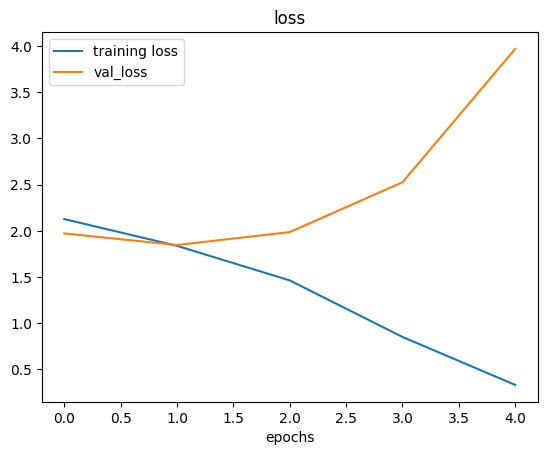

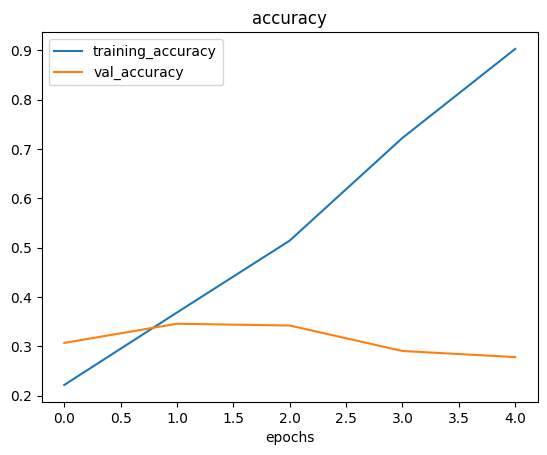

In [ ]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but failes to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline / reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get mode data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [ ]:
# How about we try and simplify the model first?
#Let's try to remove 2 convolutional layers...

model_9 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3), activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation = "softmax")
])

# Compile the model
model_9.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
#Fit the model with 2 times conv layers removed
history_9 = model_9.fit(train_data, # this is now 10 different classes
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 61s 242ms/step - loss: 2.1318 - accuracy: 0.2163 - val_loss: 1.9943 - val_accuracy: 0.2800
Epoch 2/5
235/235 [==============================] - 52s 220ms/step - loss: 1.7647 - accuracy: 0.4047 - val_loss: 1.9094 - val_accuracy: 0.3256
Epoch 3/5
235/235 [==============================] - 59s 252ms/step - loss: 1.3567 - accuracy: 0.5572 - val_loss: 2.0104 - val_accuracy: 0.3264
Epoch 4/5
235/235 [==============================] - 57s 242ms/step - loss: 0.8618 - accuracy: 0.7433 - val_loss: 2.2655 - val_accuracy: 0.2992
Epoch 5/5
235/235 [==============================] - 64s 274ms/step - loss: 0.4574 - accuracy: 0.8765 - val_loss: 2.7175 - val_accuracy: 0.2996


In [ ]:
model_9.summary()

In [ ]:
# Check out the loss curver of our model 9
plot_loss_curves(history_9)

Looks like our "simplifying the model" experiment didn't work... the accuracy wend down and overfitting continued...

How about we try data augmentation

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by usinf augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
#Let's create another model, but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8) #copies the structure but doens't copy the learning patterns and features learned by the cloned model

#Compile the cloned model (using the same setup as previous models)
model_10.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 144s 607ms/step - loss: 2.1818 - accuracy: 0.2047 - val_loss: 2.0478 - val_accuracy: 0.2616
Epoch 2/5
235/235 [==============================] - 141s 601ms/step - loss: 2.0463 - accuracy: 0.2749 - val_loss: 1.9353 - val_accuracy: 0.3340
Epoch 3/5
235/235 [==============================] - 152s 648ms/step - loss: 1.9952 - accuracy: 0.3024 - val_loss: 1.8199 - val_accuracy: 0.3820
Epoch 4/5
235/235 [==============================] - 138s 589ms/step - loss: 1.9469 - accuracy: 0.3171 - val_loss: 1.8175 - val_accuracy: 0.3764
Epoch 5/5
235/235 [==============================] - 142s 606ms/step - loss: 1.9057 - accuracy: 0.3356 - val_loss: 1.8338 - val_accuracy: 0.3624


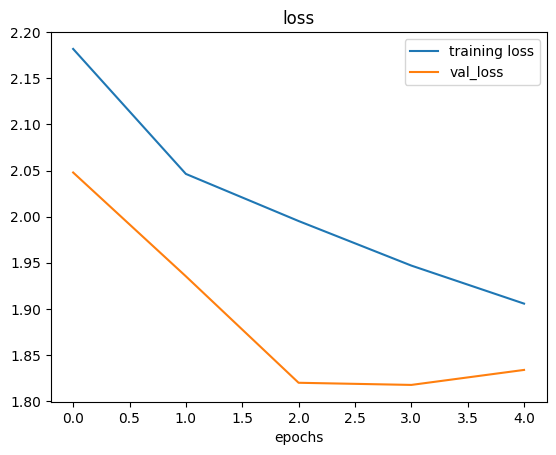

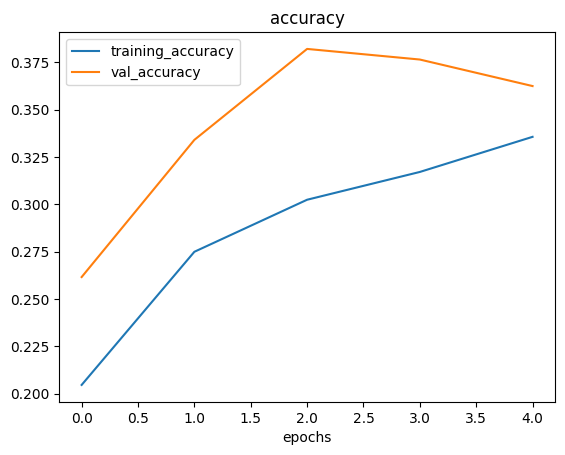

In [ ]:
#Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

This is way better! the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continuously trying to bring our loss curves closer together and trying to improve the validation / test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers / hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- try training for longer (e.g. 10 epochs instead of 5)
- try **transfer learning**

### Making a prediciton with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [ ]:
# Remind ourselves what the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
#Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg



--2023-06-29 23:50:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.03s   

2023-06-29 23:50:06 (108 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2023-06-29 23:50:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting resp

In [ ]:
#Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as title.
  """
  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Add in logic for multi-class & get predicted class name
  if(len(pred[0]) > 1):
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]


  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 18ms/step


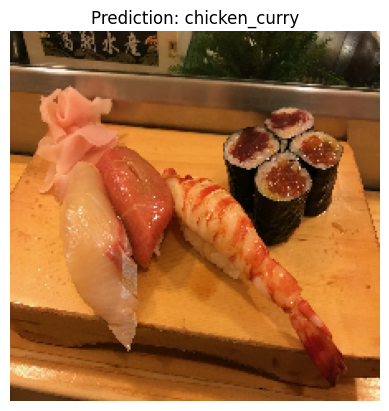

In [ ]:
# Make a prediction using model_10
pred_and_plot(model = model_10, filename = "03-sushi.jpeg", class_names = class_names)

Looks like our model didn't perform very well on our custom images but this is because it only achieved ~36% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

### Saving and loading our model

In [ ]:
# Save a model
#Note: I didn't run all the functions until this point so it might be why it didn't save properly
model_10.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10(test_data)

TypeError: ignored